In [0]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm 
import datetime
from datetime import timedelta

sns.set_style('darkgrid')

In [0]:
#Importing data from API covid19india
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
train = pd.read_csv('http://api.covid19india.org/states_daily_csv/recovered.csv')

train['date'] = pd.to_datetime(train['date'], format="%d-%b-%y")

In [3]:
#Taking Totals only
train = train[['date','TT']]
train.tail()

,date,TT
49,2020-05-02,831
50,2020-05-03,911
51,2020-05-04,1082
52,2020-05-05,1295
53,2020-05-06,1161


In [4]:
train_df = train.copy()
train_df.tail()

,date,TT
49,2020-05-02,831
50,2020-05-03,911
51,2020-05-04,1082
52,2020-05-05,1295
53,2020-05-06,1161


In [5]:
#Total Recoveries Till Now
train_df['TT'].sum()

15301

In [6]:
train_df = train_df.set_index('date')
train_df['TT'] = train_df['TT'].astype(float)
train_df.tail()

,TT
date,
2020-05-02,831.0
2020-05-03,911.0
2020-05-04,1082.0
2020-05-05,1295.0
2020-05-06,1161.0


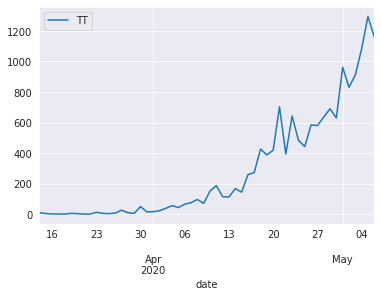

In [7]:
#Plotting Data
train_df.plot()

<Figure size 432x288 with 0 Axes>

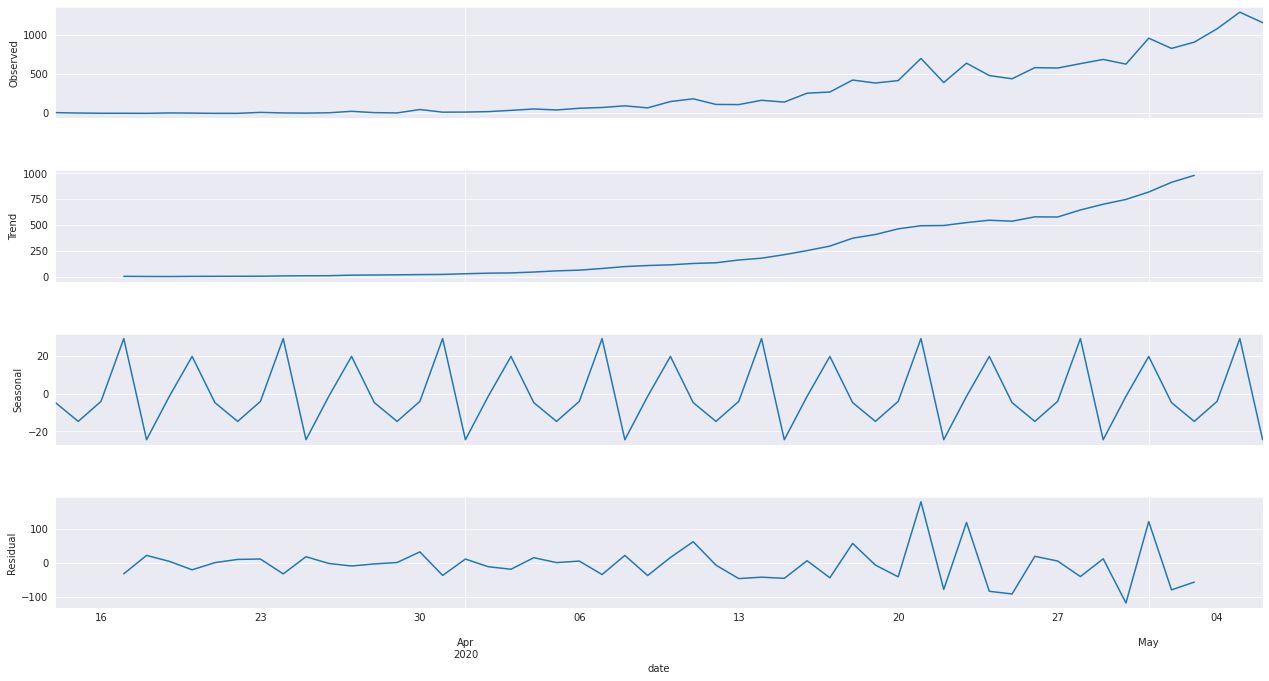

In [8]:
#Decomposing data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(train_df['TT'], model='additive')
fig = plt.figure()  
fig = decompose.plot()  
fig.set_size_inches(20, 12)

In [0]:
#Test Data Stationarity 
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  
  print(dfoutput)

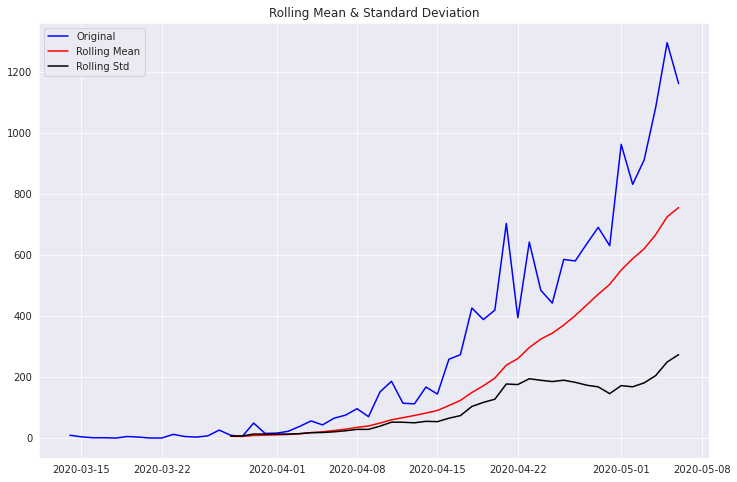

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                  3.954915
p-value                         1.000000
#Lags Used                      2.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [10]:
test_stationarity(train_df['TT'])

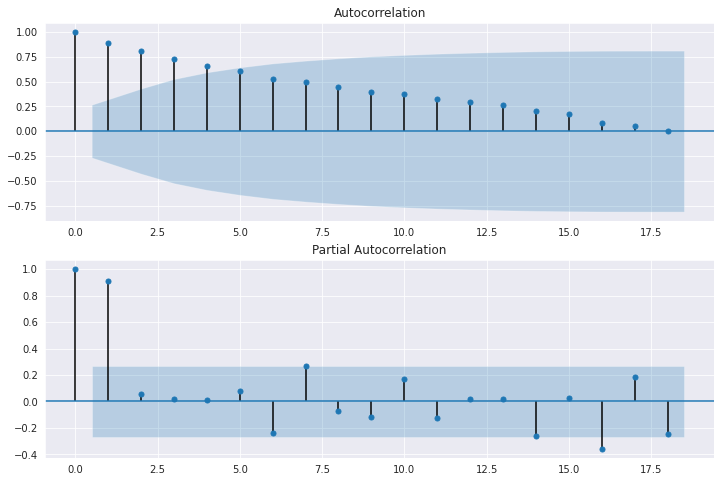

In [11]:
#autocorrelation and partial autocorrelation
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.TT, ax=ax1, ) # using default value of lag
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.TT, ax=ax2) # using default value of lag

In [12]:
#SARIMAX
#Order (14,1,0)
model = sm.tsa.statespace.SARIMAX(train_df[:-1].TT, trend='n', order=(14,1,0)).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                     TT   No. Observations:                   53
Model:              SARIMAX(14, 1, 0)   Log Likelihood                -298.612
Date:                Thu, 07 May 2020   AIC                            627.223
Time:                        18:25:17   BIC                            656.492
Sample:                    03-14-2020   HQIC                           638.444
                         - 05-05-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5707      0.275     -2.076      0.038      -1.110      -0.032
ar.L2          0.1084      0.341      0.318      0.750      -0.559       0.776
ar.L3          0.5133      0.339      1.516      0.130      -0.150       1.177
ar.L4          0.3697      0.307      1.206      0.228      -0.231       0.971
ar.L5          0.1587      0.274      0.580      0.562      -0.378       0.695
ar.L6         -0.1446      0.274     -0.527      0.598      -0.682       0.393
ar.L7         -0.1393      0.411     -0.339      0.735      -0.946       0.667
ar.L8          0.1121      0.298      0.376      0.707      -0.472       0.696
ar.L9         -0.0745      0.419     -0.178      0.859      -0.896       0.747
ar.L10         0.1402      0.362      0.387      0.699      -0.570       0.850
ar.L11         0.1747      0.314      0.557      0.578      -0.440       0.790
ar.L12         0.0830      0.553      0.150      0.881      -1.002       1.168
ar.L13        -0.0507      0.461     -0.110      0.912      -0.953       0.852
ar.L14         0.1735      0.408      0.425      0.671      -0.626       0.973
sigma2      5245.7450   1379.121      3.804      0.000    2542.718    7948.772
===================================================================================
Ljung-Box (Q):                        6.85   Jarque-Bera (JB):                10.29
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):             101.49   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

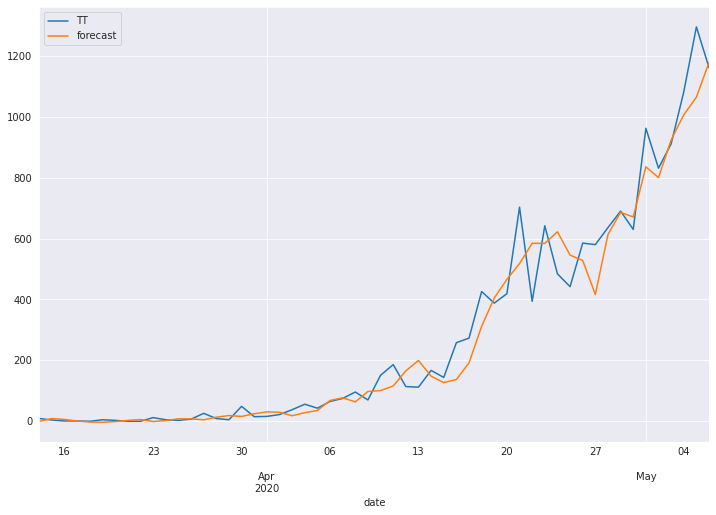

In [13]:
#Lets Predict
startD = '14-03-20'
endD = '06-05-20'
#adding forecasted values and plotting
train_df['forecast'] = model.predict(start= startD,end = endD,dynamic= False,)  

train_df[startD:][['TT', 'forecast']].plot(figsize=(12, 8))

In [0]:
#Predicting Next 10 Days
future_predict = model.predict(start= datetime.date.today()-timedelta(days=1) ,end = datetime.date.today()+timedelta(days=10) ,dynamic= False)
future_predict = future_predict.round(0)

In [15]:
future_predict

2020-05-06    1179.0
2020-05-07    1399.0
2020-05-08    1401.0
2020-05-09    1521.0
2020-05-10    1512.0
2020-05-11    1595.0
2020-05-12    1686.0
2020-05-13    1707.0
2020-05-14    1703.0
2020-05-15    1930.0
2020-05-16    1834.0
2020-05-17    1969.0
Freq: D, dtype: float64

In [0]:
last = train_df['TT'].index[-1].strftime("%d-%m-%Y")
predlast = future_predict.index[-1].strftime("%d-%m-%Y")

In [17]:
expected = train_df['TT'].sum() + future_predict[1:].sum()
expected

33558.0

In [0]:
#Joining Graph
future_predict[0]=train_df['TT'].iloc[-1]

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter( x=train_df['TT'].index, y=train_df['TT'], name = "Actual"))
fig.add_trace(go.Scatter( x=future_predict.index, y=future_predict.values, name = "Predicted",mode='markers', texttemplate='%{text:.0f}',
                         textposition='top left',line=dict(color="limegreen")
))


fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(
    title={
      'text': f"Recovered Cases Prediction <b>Covid-19 🇮🇳 INDIA </b><br>Total Recovered till {last} : {train_df['TT'][:-1].sum():.0f}<br><b>Expected Total Recoverings by {predlast} :<b style='color:limegreen'> {expected:.0f}</b></b> ",
      'y':0.94,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'},
  xaxis_title="Date",
  yaxis_title="Recoverings",
  hoverlabel=dict(
         font=dict(
      family="Lato",
      size=15,
      color="white"),
      bgcolor = "#000000",
        font_size=15, 
        font_family="Rockwell"
    ),
  font=dict(
      family="Lato",
      size=18,
      color="#7f7f7f"
  ))
fig.show()